## How to use this notebook
Any Jupyter Notebook (JN) is made of "text" (Markdown) and "code" cells. Code cells must be executed to see the result of the program. To run a cell, select it and press Shift + Enter. Using Shift + Enter multiple times will execute consecutive blocks of code one after another, while skipping text cells (executing them does nothing). It is important to run the code cells in the order they appear in the notebook.

A complete version of this JN is available by request to instructors using the book "Exploring mathematics with CAS assistance" for teaching. This version has blank or partially blank code lines that are supposed to be completed by the user before running the code.

Code cells contain (nonexecutable) comments preceded by the pound sign. The comments are of two types:
- a short comment placed on a code line typically states what the result of implementation of the encoded operation is
- a comment placed on a separate line either names the result of the following block of code lines or provides some details only for the next line where a more involved operation is encoded

The JN was written by Lydia Novozhilova.

# Problem formulation

Consider two lists of data of equal length for a predictor variable $x$ and response variable $y.$ Suppose that a plot of log-log data shows some linear association.This suggests that the variables are related by a power law $y = cx^r.$ Do the following.
- Make a function **my_lst_squares** that
  - uses a built-in Python function for linear list squares solution to find the slope and intersept of the linear fit for the log-log data
  - makes a figure with plot of the log-log data and the line of best fit
$$\ln(y)=m\ln(x)+b \qquad (*)$$
  
- Make a function **find_value** that takes an unseen predictor/response variable value (not in the original data) and estimates a response/predictor variable value using the power model derived from equation (*).

Before using computer implementation of this problem on a specific data, the user should verify that the log-log plot of the data points shows linear association.

For more details read Section 10.5.1 and use the data there to test the functions in this lab. For general information on linear regression refer to Section 10.5.


  


## Special features ##
1. Function **np.linalg.lstsq(np.vstack([U, np.ones(len(x))]).T, V, rcond=None)[0]**. This built-in function (used in **my_list_squares**)  encodes several steps for constructing a system $AU = V$ and solving it by the LS method. The function arguments are:
 - **np.vstack([U, np.ones(len(x))]).T** -- the system matrix $A.$ Here **U** is the Numpy array for $x,$ and symbol **T** stands for the transposition operation.
 - **rcond=None** sets the machine precision computations to default value.
 - **np.linalg.lstsq** solves the system $AU = V$ by the *LS method*. Here **V** is the Numpy array for $y.$ (Refer to p. 155 for a detailed demonstration of the LS method in the simplest possible setting.)
 - the last element $[0]$ of the function code selects the list of parameters $[m,b]$ from the output tuple produced by the function **np.linalg.lstsq**.
  A simple example below illustrates inner workings of this function.   
2. Function **global** $m,b$ makes parameters $m,\,b$ of the linear regression line found by **LS_log** available for the function **find_value**.




In [ ]:
# Loading libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Example: illustration of the inner workings of the function
# np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y, rcond=None)[0]

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
print('A =',A)
res = np.linalg.lstsq(A, y, rcond=None)[0]
print('Parameters: m=',res[0].round(3),'b=',res[1].round(3))

A = [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
Parameters: m= 1.0 b= -0.95


In [ ]:
# Data for the test example
w = [0.0063,0.0295,0.8450,2.0000,22.7000,67.3000,6600.0000]
bw = [0.0003,0.0013,0.0436,0.1810,1.1500,12.2000,1782.0000]

In [ ]:
# Least square implementation for log-log data

def LS_log(x,y):
  """
  Args:
    x: list of x-data
    y: list of y-data
  Output:
    parameters m, b of the best linear log-log fit log(y)=m*log(x)+b and
    plot of log-log data and the fitted line
  """
  # Set up figure parameters
  ax = plt.figure()
  plt.rcParams['figure.figsize'] = [4,3]
  ttl='Regression line and log-log plot of data'
  plt.title(ttl)

  # Finding parameters of linear fit for log-log data
  U = np.array(np.log(x))
  # fill in the blanks in the next two code lines
  V = np.array(?)
  res = np.linalg.lstsq(np.vstack([U, np.ones(?)]).T, V, rcond=None)[?]


  global m,b
  m=round(res[0],5) # slope approximation
  b=? # encode y-intersept approximation

  print('Slope =',m,', y-intersept =',b)
  plt.plot(U, V, 'o', label='log-log data', markersize=5)
  plt.plot(U, m*U + b, color='red', label='Fitting line')
  plt.legend()
  plt.show()

Slope = 1.12998 , y-intersept = -2.65437


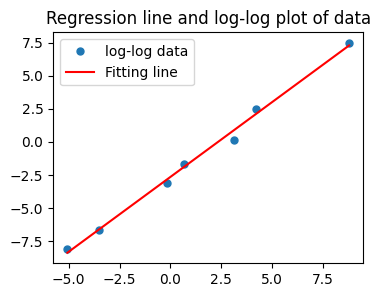

In [ ]:
# Example
LS_log(w,bw)

In [ ]:
# Using power law found by manual potentiation of (*) for predicting
# one of the original variables value given a new value of the other variable

def find_value(val,p):
  """
  Args:
    val: value of x- or y-variable (float)
    p: parameter; if p=0, val is x-value; for any other value val is y-value
  Output:
    value of y if x=val or value of x if y=val
  """
  if p==0:
    # encode y-value estimate for predictor variable value x=val
    yval = ?
    print('y = ',round(yval,4))
  else:
    # complete encoding of x-value estimate for response variable value y=val
    xval = np.exp((np.log(val)-?)/?)
    print('x = ',round(xval,4))


In [ ]:
# Example: Estimating bone weight for given weight value
find_value(82,0)

y =  10.2281


In [ ]:
# Example: Estimating weight for given bone weight value
find_value(10.23,1)

x =  82.0138
